## Цели и задачи проекта

Целью проекта является проведение исследовательского анализа данных сервиса продажи билетов на мероприятия и культурные события, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Для достижения цели поставлены следующие задачи:
- выяснить причины изменения пользовательского спроса с наступлением осени,
- выявить наиболее популярные события,
- определить лидеров среди организаторов и площадок,
- понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.


## Описание данных

Для работы имеются в распоряжении данные о бронировании билетов за период с 1 июня по 31 октября 2024 года. Данные состоят из двух датасетов:
1. *final_tickets_orders_df.csv* - включает информацию обо всех заказах билетов, совершённых с двух типов устройств: мобильных и стационарных. 

2.  *final_tickets_events_df.csv* - содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

Также для конвертации валют имеется в распоряжении датасет *final_tickets_tenge_df.csv* с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. 

## Содержание проекта

Содержание:
1. [Загрузка данных и знакомство с ними](#soderjanie_1)
2. [Предобработка данных и подготовка их к исследованию](#soderjanie_2)
3. [Исследовательский анализ данных](#soderjanie_3)
4. [Статистический анализ данных](#soderjanie_4)
5. [Общий вывод и рекомендации](#soderjanie_5)


## 1. Загрузка данных и знакомство с ними <a id='soderjanie_1'></a>

In [205]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеку для диаграммы Венна
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn2_circles

# Импортируем библиотеки для проведения стат.тестов
import scipy
from scipy.stats import mannwhitneyu


In [206]:
# Выгружаем данные из датасетов в датафреймы

orders = pd.read_csv(PATH + 'final_tickets_orders_df.csv') 
events = pd.read_csv(PATH + 'final_tickets_events_df.csv') 
tenge = pd.read_csv(PATH + 'final_tickets_tenge_df.csv') 

In [207]:
# Выводим на экран первые пять строк полученных датафреймов
orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [208]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [209]:
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [210]:
# Объединим все датафреймы в один
df=orders.merge(events, on='event_id').merge(tenge, left_on='created_dt_msk', right_on='data', how='left')

In [211]:
# Выводим на экран первые пять строк объединенного датафрейма
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt


In [212]:
# Выводим информацию о датафрейме
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [213]:
# Выводим количество пустых значений в каждой колонке
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
data                          0
nominal                       0
curs                          0
cdx                           0
dtype: int64

Датафрейм содержит 290611 строк и 28 столбцов. Пропуски содержатся только в столбце days_since_prev - 21913 строк с пропусками. Типы данных необходимо изменить у столбцов, содержащих временные данные: created_dt_msk, created_ts_msk и data - с object на datetime64.
Также для экономии ресурсв целесообразно уменьшить разрядность у полей типа int64: order_id, event_id, age_limit, tickets_count, city_id, venue_id, nominal. На основе предварительного ознакомления можно сделать вывод, что содержание данных в целом соответсвует описаню, дополнительно в датафрейме есть столбец city_id с индикатором города.

## 2. Предобработка данных и подготовка их к исследованию  <a id='soderjanie_2'></a>

In [214]:
# Изменяем тип данных у столбцов, содержащих временные значения
for i in ['created_dt_msk', 'created_ts_msk', 'data']:
    df[i]=pd.to_datetime(df[i])

In [215]:
# Меняем тип данных на целочисленный с определением оптимальной размерности данных
for i in ['order_id', 'event_id', 'age_limit', 'tickets_count', 'city_id', 'venue_id', 'nominal']:
    df[i]=pd.to_numeric(df[i], downcast='integer')

In [216]:
#Выводим типы данных в датафрейме
df.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                       int8
total                            float64
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                            int32
venue_id                           int16
venue_name                        object
venue_address                     object
data            

Типы данных изменены успешно.

In [217]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'event_type_main', 'event_type_description','region_name']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце cinema_circuit:
['Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм' 'нет']

Уникальные значения в столбце age_limit:
[ 0  6 12 16 18]

Уникальные значения в столбце currency_code:
['kzt' 'rub']

Уникальные значения в столбце device_type_canonical:
['desktop' 'mobile']

Уникальные значения в столбце event_type_main:
['выставки' 'другое' 'концерты' 'спорт' 'стендап' 'театр' 'ёлки']

Уникальные значения в столбце event_type_description:
['балет' 'выставка' 'концерт' 'кукольный спектакль'
 'музыкальный спектакль' 'мюзикл' 'опера' 'оперетта' 'подарок'
 'рок-мюзикл' 'снегурочка' 'событие' 'спектакль' 'спорт'
 'спортивное мероприятие' 'фестиваль' 'цирковое шоу' 'шоу' 'экскурсия'
 'ёлка']

Уникальные значения в столбце region_name:
['Белоярская область' 'Берестовский округ' 'Берёзовская область'
 'Боровлянский край' 'Верховинская область' 'Верхозёрский край'
 'Верхоречная область' 'Ветренский регион' 'Вишнёвский край'
 'Глиногорская область' 'Голубевский округ'

Категориальные значения не задвоены, среди них не выявлены подозрительные значения.

In [218]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

Явных дубликатов нет.

In [219]:
# Проверяем неявные дубликаты в датафрейме по полю  order_id
df.duplicated(subset='order_id').sum()

0

In [220]:
# Проверяем неявные дубликаты в датафрейме по всем полям, кроме order_id
df.duplicated(subset=['created_dt_msk','user_id','created_ts_msk','event_id','cinema_circuit',
                      'age_limit','currency_code','device_type_canonical','revenue',
                      'service_name','tickets_count','total','days_since_prev',
                      'event_name','event_type_description','event_type_main',
                      'organizers','region_name','city_name','city_id','venue_id',
                      'venue_name','venue_address','data','nominal','curs','cdx']).sum()

30

In [221]:
#Выводим строки-дубликат
df[df.duplicated(subset=['user_id','created_dt_msk','created_ts_msk','event_id','cinema_circuit','age_limit','currency_code','device_type_canonical','revenue','service_name','tickets_count','total','days_since_prev','event_name','event_type_description','event_type_main','organizers','region_name','city_name','city_id','venue_id','venue_name','venue_address','data','nominal','curs','cdx'])].head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
3839,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-24,100,19.1202,kzt
8915,7927528,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.00,...,Каменевский регион,Глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1",2024-06-19,100,19.2165,kzt
48973,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482",2024-08-23,100,19.1903,kzt
48977,5373179,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482",2024-08-23,100,19.1903,kzt
79485,6114564,8d6c1ff89fac35f,2024-10-31,2024-10-31 22:28:57,589624,нет,16,rub,desktop,41.83,...,Каменевский регион,Глиногорск,213,1365,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4",2024-10-31,100,19.7383,kzt


In [222]:
# Определим долю строк - дубликатов
propuski=round(df.duplicated(subset=['user_id','created_dt_msk','created_ts_msk','event_id','cinema_circuit','age_limit','currency_code','device_type_canonical','revenue','service_name','tickets_count','total','days_since_prev','event_name','event_type_description','event_type_main','organizers','region_name','city_name','city_id','venue_id','venue_name','venue_address','data','nominal','curs','cdx']).sum()*100/df.shape[0],2)
print(f'Доля строк с неявными пропусками равна {propuski}%')

Доля строк с неявными пропусками равна 0.01%


Так как строки с неявными пропусками совпадают в том числе и по колонке со значением даты и времени создания заказа, что невозможно в реальности, то вероятнее всего эти задвоения вызваны техническими ошибками. Доля строк - дубликатов составляет 0,01%, что меньше даже одного процента. Поэтому эти строки стоит удалить.

In [223]:
#Удалим строки-дубликаты и обновим индексы
df=df.drop_duplicates(subset=['user_id','created_dt_msk','created_ts_msk','event_id','cinema_circuit','age_limit','currency_code','device_type_canonical','revenue','service_name','tickets_count','total','days_since_prev','event_name','event_type_description','event_type_main','organizers','region_name','city_name','city_id','venue_id','venue_name','venue_address','data','nominal','curs','cdx']).reset_index(drop=True)

Расссмотрим количественные показатели - выручку и количество билетов. Посмотрим на статистические показатели этих столбцов, построим гистограмму и диаграмму размаха.

In [224]:
# Изучаем статистические показатели столбца revenue в рублях
print('Статистические показатели столбца revenue:')
df[df['currency_code']=='rub']['revenue'].describe()

Статистические показатели столбца revenue:


count    285512.000000
mean        548.036278
std         871.782124
min         -90.760000
25%         114.190000
50%         346.700000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

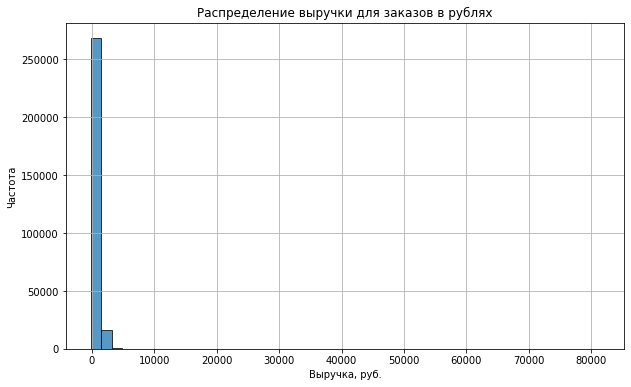

In [225]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df[df['currency_code']=='rub']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение выручки для заказов в рублях')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

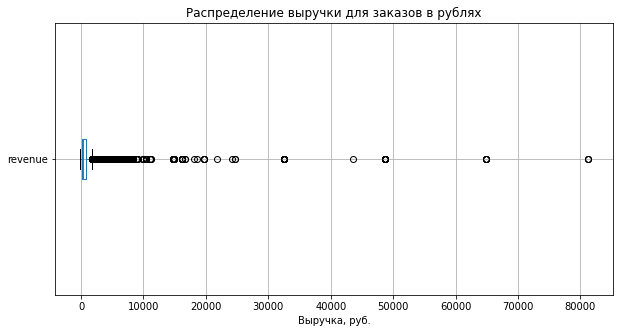

In [226]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха значений в столбце 
df[df['currency_code']=='rub'].boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки для заказов в рублях')
plt.xlabel('Выручка, руб.')

# Выводим график
plt.show()

In [227]:
#Найдем количество строк с отрицательными значениями 
df[(df['currency_code']=='rub')&(df['revenue']<0)].shape[0]

381

Распределение выручки в рублях имеет ярко выраженную правостороннюю асимметрию. Наблюдаются выбросы в правой части. Также 381 строка содержит отрицательные значения по этому полю.

In [228]:
# Изучаем статистические показатели столбца revenue в тенге
print('Статистические показатели столбца revenue:')
df[df['currency_code']=='kzt']['revenue'].describe()

Статистические показатели столбца revenue:


count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

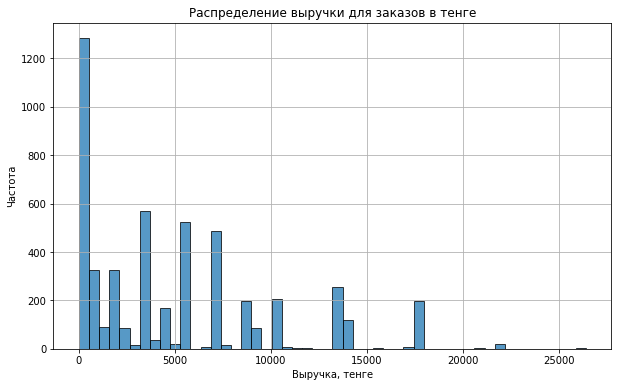

In [229]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df[df['currency_code']=='kzt']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение выручки для заказов в тенге')
plt.xlabel('Выручка, тенге')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

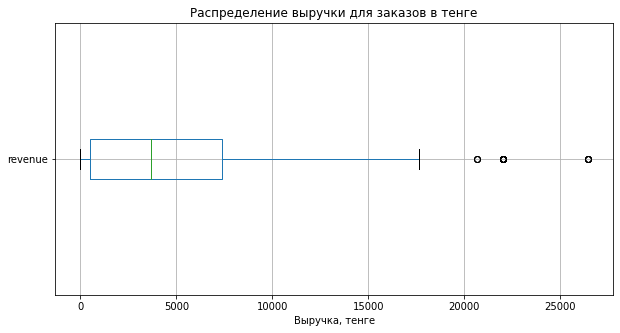

In [230]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха значений в столбце 
df[df['currency_code']=='kzt'].boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки для заказов в тенге')
plt.xlabel('Выручка, тенге')

# Выводим график
plt.show()

Распределение выручки в тенге имеет умеренно выраженную правостороннюю асимметрию. Наблюдается небольшое количество выбросов в правой части графика. 

In [231]:
# Изучаем статистические показатели столбца tickets_count
print('Статистические показатели столбца tickets_count:')
df['tickets_count'].describe()

Статистические показатели столбца tickets_count:


count    290581.000000
mean          2.754337
std           1.170614
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

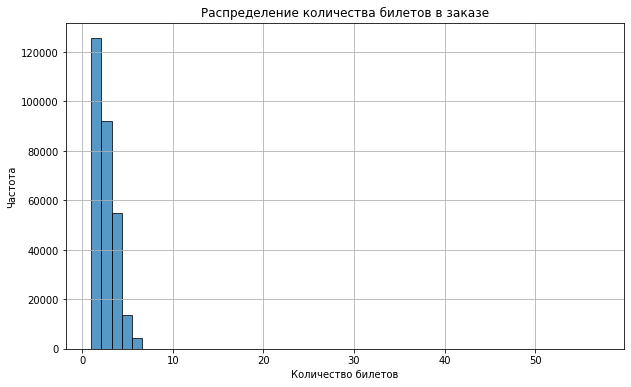

In [232]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['tickets_count'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

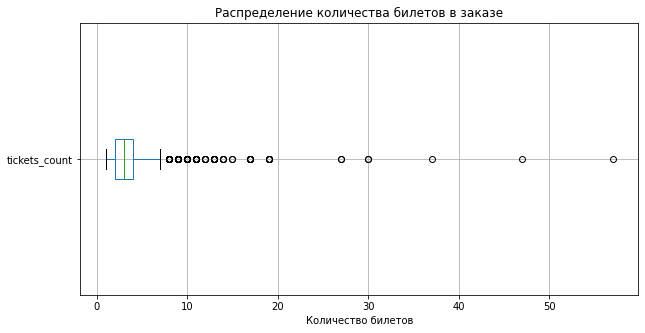

In [233]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха значений в столбце 
df.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()

Распределение количества билетов в заказе имеет умеренно выраженную правостороннюю асимметрию. Наблюдается небольшое количество выбросов в правой части графика. Но значения не экстремально высокие, поэтому не требуют корректировки.

Создадим несколько новых столбцов:
- revenue_rub — приведем выручку с заказа к единой валюте — российскому рублю. 
- one_ticket_revenue_rub — рассчитаем выручку с продажи одного билета на мероприятие.
- month — выделим месяц оформления заказа в отдельный столбец.
- season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [234]:
# Создаем дополнительный столбец revenue_rub
df['revenue_rub']=df['revenue']
df.loc[df['currency_code']=='kzt','revenue_rub']=df['curs']*df['revenue']/100

Выбросы по полю revenue существенные, их наличие может повлиять на проведение последующего анализа, поэтому ограничим данные по выручке 99% перцентилем и отфильтруем отрицательные значения, так как выручка по определению не может быть отрицательной. 

In [235]:
#Сохраним данные, ограниченные 99% перцентилем по столбцу с выручкой в рублях, 
# а также отфильтруем отрицательные значения по этому полю
df = df[(df['revenue_rub'] <= df['revenue_rub'].quantile(0.99)) & (df['revenue_rub'] >=0)].reset_index(drop=True)

In [236]:
# Создаем дополнительный столбец one_ticket_revenue_rub
df['one_ticket_revenue_rub']=df['revenue_rub']/df['tickets_count']

In [237]:
# Создаем дополнительный столбец month и приведем его к целочисленному типу
df['month'] = df['created_dt_msk'].dt.month
df['month']=pd.to_numeric(df['month'], downcast='integer')

In [238]:
# Создаем дополнительный столбец season
def get_season(row):
    if 3 <= row['month'] <= 5:
        return "весна"
    elif 6 <= row['month'] <= 8:
        return "лето"
    elif 9 <= row['month'] <= 11:
        return "осень"
    else:
        return "зима"
    
df['season']=df.apply(get_season, axis=1)

In [239]:
# Выводим на экран случайные 10 строк датафрейма df после проведенных преобразований
df.sample(n=10)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
238171,4478587,a5435ac7e6de685,2024-09-17,2024-09-17 15:27:10,555995,нет,6,rub,mobile,1562.12,...,"Кинокомпания ""Динамика"" Лтд","наб. Суворова, д. 8/5 стр. 8",2024-09-17,100,19.0125,kzt,1562.12,520.706667,9,осень
271853,7376992,53ee566d2838890,2024-10-05,2024-10-05 20:35:35,546792,нет,6,rub,desktop,254.61,...,"Клуб любителей книг ""Минимум"" Инк","бул. Кленовый, д. 1/3 стр. 968",2024-10-05,100,19.6475,kzt,254.61,84.870000,10,осень
33913,2917459,02ea4583333f064,2024-08-21,2024-08-21 04:59:45,503373,нет,16,rub,mobile,237.30,...,"Центр традиционных ремесел ""Задумка"" и партнеры","ш. Кошевого, д. 9/5",2024-08-21,100,18.9444,kzt,237.30,237.300000,8,лето
271279,6777939,c5f19be94257752,2024-10-16,2024-10-16 12:10:44,339463,нет,0,rub,mobile,366.23,...,"Школа композиции ""Магнит"" Инк","алл. Герцена, д. 8/6 к. 3",2024-10-16,100,20.0393,kzt,366.23,91.557500,10,осень
276701,5126795,b99f3746d279c06,2024-06-28,2024-06-28 09:57:09,404243,нет,18,rub,mobile,875.59,...,"Заповедник ""Стройка"" Групп","алл. Юбилейная, д. 1 стр. 313",2024-06-28,100,18.3203,kzt,875.59,291.863333,6,лето
94500,1389652,024dc5236465850,2024-09-04,2024-09-04 15:08:45,545260,нет,6,rub,mobile,222.97,...,"Комикс-студия ""Секрет"" Лимитед","бул. Стахановский, д. 4/7 стр. 271",2024-09-04,100,18.3640,kzt,222.97,44.594000,9,осень
217403,5705142,6cf5aff356429e5,2024-10-31,2024-10-31 08:48:38,367631,нет,18,rub,mobile,111.58,...,"Творческий форум ""Магнит"" Лтд","пр. Бульварный, д. 5 стр. 7",2024-10-31,100,19.7383,kzt,111.58,27.895000,10,осень
229157,6332702,86d64bd3d47235c,2024-09-11,2024-09-11 10:10:40,454830,нет,0,rub,mobile,26.14,...,"Зал для музыкантов ""Калейдоскоп"" Инк","наб. Морская, д. 98 стр. 1/7",2024-09-11,100,19.0258,kzt,26.14,13.070000,9,осень
30619,2140520,c2c6d35ff678ca6,2024-08-13,2024-08-13 18:06:36,459673,нет,12,rub,mobile,1970.31,...,"Клуб настольных игр ""Canvas"" Инкорпорэйтед","алл. Краснофлотская, д. 418 стр. 91",2024-08-13,100,18.8553,kzt,1970.31,492.577500,8,лето
174425,4794658,4ec8f6429431987,2024-10-23,2024-10-23 18:01:28,571833,нет,16,rub,mobile,446.89,...,"Цирк ""Энергия"" Инкорпорэйтед","пр. Толбухина, д. 99",2024-10-23,100,20.0531,kzt,446.89,148.963333,10,осень


In [240]:
# Выводим информацию о датафрейме после проведенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287375 entries, 0 to 287374
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287375 non-null  int32         
 1   user_id                 287375 non-null  object        
 2   created_dt_msk          287375 non-null  datetime64[ns]
 3   created_ts_msk          287375 non-null  datetime64[ns]
 4   event_id                287375 non-null  int32         
 5   cinema_circuit          287375 non-null  object        
 6   age_limit               287375 non-null  int8          
 7   currency_code           287375 non-null  object        
 8   device_type_canonical   287375 non-null  object        
 9   revenue                 287375 non-null  float64       
 10  service_name            287375 non-null  object        
 11  tickets_count           287375 non-null  int8          
 12  total                   287375

In [241]:
del_str=round((orders.merge(events, on='event_id').merge(tenge, left_on='created_dt_msk', right_on='data', how='left').shape[0]-df.shape[0])*100/orders.merge(events, on='event_id').merge(tenge, left_on='created_dt_msk', right_on='data', how='left').shape[0],2)

In [242]:
f'В ходе предобработки данных было отфильтровано {del_str}% строк с данными от первоначального объема.'

'В ходе предобработки данных было отфильтровано 1.11% строк с данными от первоначального объема.'

----

В ходе предобработки данных были выполнены следующие шаги:
- Изменен тип данных у столбцов, содержащих времнные данные: created_dt_msk, created_ts_msk и data - с object на datetime64. Уменьшена разрядность у полей целочисленного типа : order_id, event_id, age_limit, tickets_count, city_id, venue_id, nominal.
- Проверены категориальные значения. Аномальных значений в них не найдено.
- Проверены явные и неявные дубликаты. Явные дубликаты отсутствуют. Неявных дубликатов выявлено 30 строк, их доля равна 0,01% от общего количества строк. Неявные дубликаты были удалены.
- Изучено распределение количественных значений по полям revenue (в рублях и тенге по отдельности) и tickets_count. Выявлено, что на качество данных влияет распределение выручки, которое имеет ярковыраженную правостороннюю асимметрию и большое количество выбросов. В результате данные по выручке в рублях ограничены 99% перцентилем и отфильтрованы отрицательные значения.

В ходе предобработки данных было отфильтровано всего 1.11% строк с данными от первоначального объема.

Также созданы несколько новых столбцов:

- revenue_rub — приведем выручку с заказа к единой валюте — российскому рублю.
- one_ticket_revenue_rub — рассчитаем выручку с продажи одного билета на мероприятие.
- month — выделим месяц оформления заказа в отдельный столбец.
- season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

В итоге датафрейм df содержит 287066 строк и 32 столбца. 

## 3. Исследовательский анализ данных  <a id='soderjanie_3'></a>

**Проанализируем изменение пользовательской активности и пользовательского интереса в связи с сезонностью.**

В первую очередь для каждого месяца найдем количество заказов и визуализируем результаты.

In [243]:
# Сгруппируем данные по месяцу и посчитаем количество заказов для каждого месяца
df_order_count=df.groupby('month')['order_id'].count()
df_order_count

month
6     33795
7     40406
8     44554
9     69327
10    99293
Name: order_id, dtype: int64

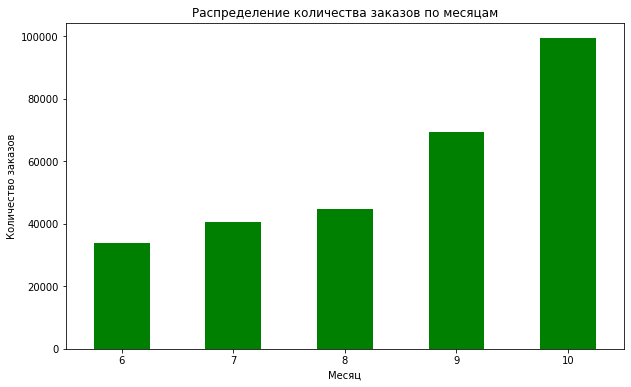

In [244]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_order_count.plot(kind='bar',
title='Распределение количества заказов по месяцам',
legend=False,
ylabel='Количество заказов',
xlabel='Месяц',
rot=0,
color='green',
figsize=(10,6))

plt.show()

Столбчатая диаграмма наглядно показывает, что количество заказов увеличивается с июня по октябрь, при этом с сентября рост стал более интенсивным.

**Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу.**

In [245]:
# Найдем распределение долей заказов по типам мероприятий для каждого сезона
df_season_event = df.groupby('season')['event_type_main'].value_counts(normalize=True)
df_season_event = df_season_event.to_frame().rename(columns={'event_type_main': 'share'}).reset_index()
df_season_event 

,season,event_type_main,share
0,лето,концерты,0.425734
1,лето,другое,0.271214
2,лето,театр,0.201743
3,лето,стендап,0.053455
4,лето,спорт,0.025287
5,лето,выставки,0.020269
6,лето,ёлки,0.002299
7,осень,концерты,0.373052
8,осень,театр,0.253600
9,осень,другое,0.196127


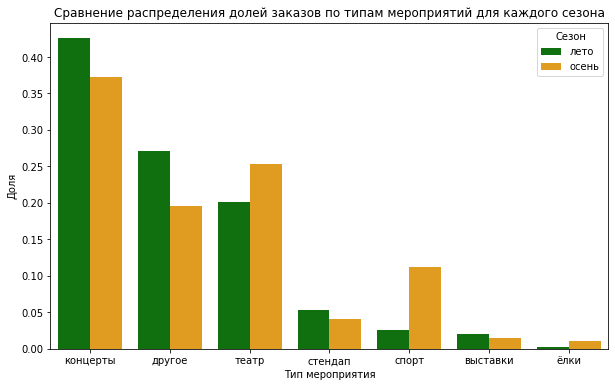

In [246]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=df_season_event, x='event_type_main', y='share',  hue='season', 
            palette={'лето':'green', 'осень':'orange'})
plt.title('Сравнение распределения долей заказов по типам мероприятий для каждого сезона')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля')
plt.legend(title='Сезон')
plt.show()

In [247]:
# Найдем распределение долей заказов по типам устройств для каждого сезона
df_device = df.groupby('season')['device_type_canonical'].value_counts(normalize=True)
df_device = df_device.to_frame().rename(columns={'device_type_canonical': 'share'}).reset_index()
df_device

,season,device_type_canonical,share
0,лето,mobile,0.806753
1,лето,desktop,0.193247
2,осень,mobile,0.796317
3,осень,desktop,0.203683


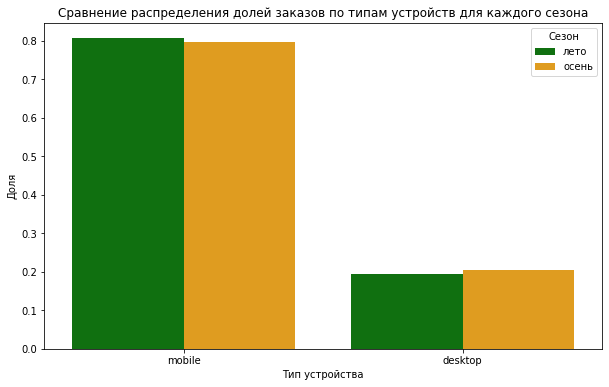

In [248]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=df_device, x='device_type_canonical', y='share',  hue='season', 
            palette={'лето':'green', 'осень':'orange'})
plt.title('Сравнение распределения долей заказов по типам устройств для каждого сезона')
plt.xlabel('Тип устройства')
plt.ylabel('Доля')
plt.legend(title='Сезон')
plt.show()

In [249]:
# Найдем распределение долей заказов по возрастным группам для каждого сезона
df_age_limit = df.groupby('season')['age_limit'].value_counts(normalize=True)
df_age_limit = df_age_limit.to_frame().rename(columns={'age_limit': 'share'}).reset_index()
df_age_limit

,season,age_limit,share
0,лето,16,0.284350
1,лето,12,0.203166
2,лето,6,0.183234
3,лето,0,0.179142
4,лето,18,0.150107
5,осень,16,0.262246
6,осень,0,0.235518
7,осень,12,0.221089
8,осень,6,0.176924
9,осень,18,0.104223


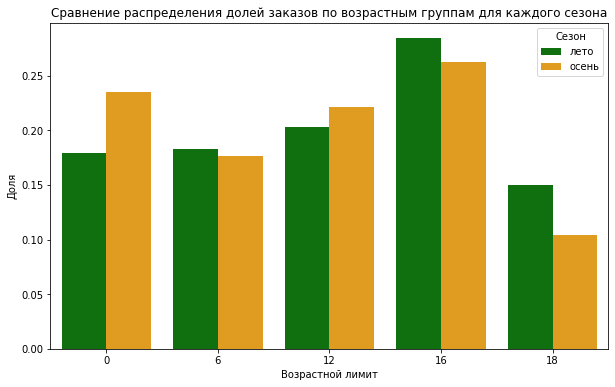

In [250]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=df_age_limit, x='age_limit', y='share',  hue='season', 
            palette={'лето':'green', 'осень':'orange'})
plt.title('Сравнение распределения долей заказов по возрастным группам для каждого сезона')
plt.xlabel('Возрастной лимит')
plt.ylabel('Доля')
plt.legend(title='Сезон')
plt.show()

**Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.**

In [251]:
# Найдем распределение долей заказов по возрастным группам для каждого сезона
df_one_ticket_revenue_rub = df.groupby(['season','event_type_main'])['one_ticket_revenue_rub'].mean()
df_one_ticket_revenue_rub=df_one_ticket_revenue_rub.to_frame().rename(columns={'one_ticket_revenue_rub': 'mean'}).reset_index()
df_one_ticket_revenue_rub

,season,event_type_main,mean
0,лето,выставки,86.744476
1,лето,другое,77.826176
2,лето,концерты,302.347778
3,лето,спорт,50.813367
4,лето,стендап,218.585827
5,лето,театр,214.398965
6,лето,ёлки,271.436176
7,осень,выставки,91.905093
8,осень,другое,76.475589
9,осень,концерты,269.324024


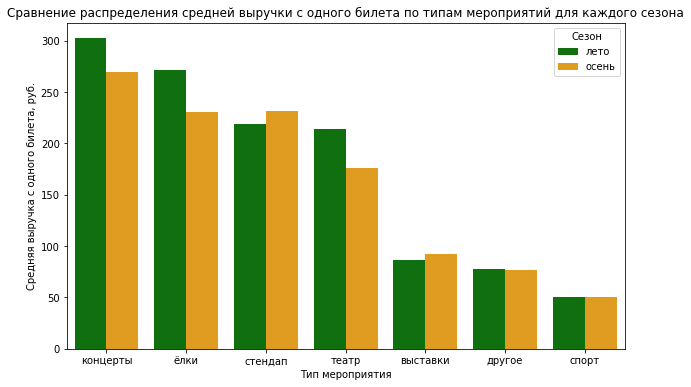

In [252]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=df_one_ticket_revenue_rub.sort_values(by='mean',ascending=False), x='event_type_main', y='mean',  hue='season', 
            palette={'лето':'green', 'осень':'orange'})
plt.title('Сравнение распределения средней выручки с одного билета по типам мероприятий для каждого сезона')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка с одного билета, руб.')
plt.legend(title='Сезон')
plt.show()

In [253]:
#Создадим сводную таблицу для сравнения показателей
pivot=df_one_ticket_revenue_rub.pivot_table(values='mean', index='event_type_main', columns='season', aggfunc='sum')
pivot

season,лето,осень
event_type_main,,
выставки,86.744476,91.905093
другое,77.826176,76.475589
концерты,302.347778,269.324024
спорт,50.813367,50.021718
стендап,218.585827,231.466954
театр,214.398965,176.231359
ёлки,271.436176,230.310069


In [254]:
# Добавим в сводную таблицу поле с расчетом относительного размера изменений показателей в %
pivot['delta']=(pivot['осень']-pivot['лето'])*100/pivot['лето']
pivot=pivot.reset_index()
pivot

season,event_type_main,лето,осень,delta
0,выставки,86.744476,91.905093,5.949217
1,другое,77.826176,76.475589,-1.735389
2,концерты,302.347778,269.324024,-10.922440
3,спорт,50.813367,50.021718,-1.557955
4,стендап,218.585827,231.466954,5.892938
5,театр,214.398965,176.231359,-17.802141
6,ёлки,271.436176,230.310069,-15.151299


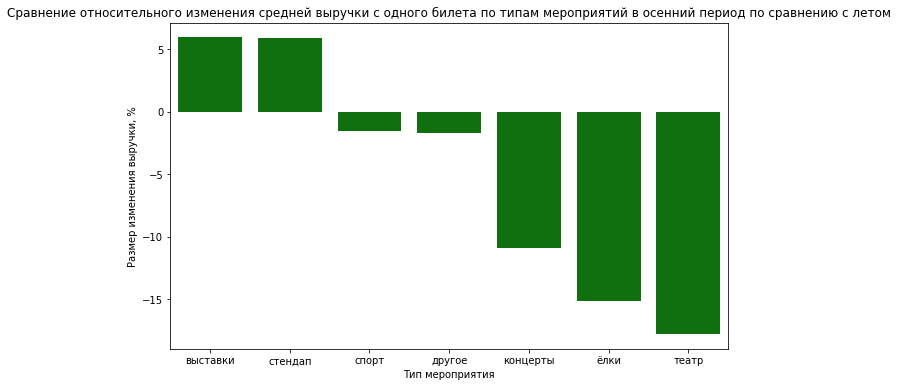

In [255]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot.sort_values(by='delta',ascending=False), x='event_type_main', y='delta', 
           color='green')
plt.title('Сравнение относительного изменения средней выручки с одного билета по типам мероприятий в осенний период по сравнению с летом')
plt.xlabel('Тип мероприятия')
plt.ylabel('Размер изменения выручки, %')
plt.show()

___

Анализ распределения долей заказов по разным категориям позволяет сделать следующие выводы:
- По типам мероприятий распределение имеет общие черты - топ-3 мероприяти одинаковые, это концерты, другое и театр. Но есть и различия - с наступление осени становятся более популярны театры, они занимают 2 место (а летом третье), также осенью увеличивается доля  спортивных мероприятий и елок.
- По типам устройст распределение практически не отличается, значительным преимуществом пользуются мобильные устройства. Но можно отметить, что осенью наблюдается незначительное увеличение доли стационарных устройств.
- По возрастным категориям распределение имеет относительно равномерный характер. Но можно выделить следующие особенности: как летом, так и осенью наиболее популярной категорией является 16+, а наименее популярной - 18+. При этом осенью становятся значительно более популярна детская категория 0+, с четвертого места летом она перемещается на второе осенью, также более востребованной осенью становится категория 12+. А вот доля более взрослыех категорий 16+ и 18+ осенью уменьшается.

Анализ изменения выручки с продаж одного билета показал, что по всем типам мероприятий выручка с одного билета осенью падает, кроме 2 типов - выставки и стендап. Наиболее значительный спад в выручке с одного билета наблюдается по следующим типам мероприятий - театр и елки.

**Изучим активность пользователей осенью 2024 года.**

Для этого проанализируем динамику изменений по дням для:
- общего числа заказов;
- количества активных пользователей DAU;
- среднего числа заказов на одного пользователя;
- средней стоимости одного билета.

In [256]:
#Сохраним в отдельный датафрейм данные за осенний период
df_fall=df[df['created_dt_msk'].between('2024-09-01', '2024-10-31')].reset_index(drop=True)

In [257]:
#Сгруппируем данные и получим сведения общего числа заказов, количества активных пользователей и
#средней стоимости одного билета по дням
df_fall_gr=df_fall.groupby('created_dt_msk').agg({'order_id':'count', 'user_id':'nunique', 'one_ticket_revenue_rub':'mean'}).reset_index()

In [258]:
#Создадим новый столбец со средним числом заказов на одного пользователя
df_fall_gr['order_avg']=df_fall_gr['order_id']/df_fall_gr['user_id']
df_fall_gr

,created_dt_msk,order_id,user_id,one_ticket_revenue_rub,order_avg
0,2024-09-01,1331,565,201.678176,2.355752
1,2024-09-02,1376,573,190.015637,2.401396
2,2024-09-03,5095,777,80.802794,6.557272
3,2024-09-04,1761,684,179.630227,2.574561
4,2024-09-05,1942,739,190.040733,2.627876
...,...,...,...,...,...
56,2024-10-27,2849,1034,188.109793,2.755319
57,2024-10-28,2840,985,171.174806,2.883249
58,2024-10-29,2838,999,178.586734,2.840841
59,2024-10-30,2928,1040,183.350243,2.815385


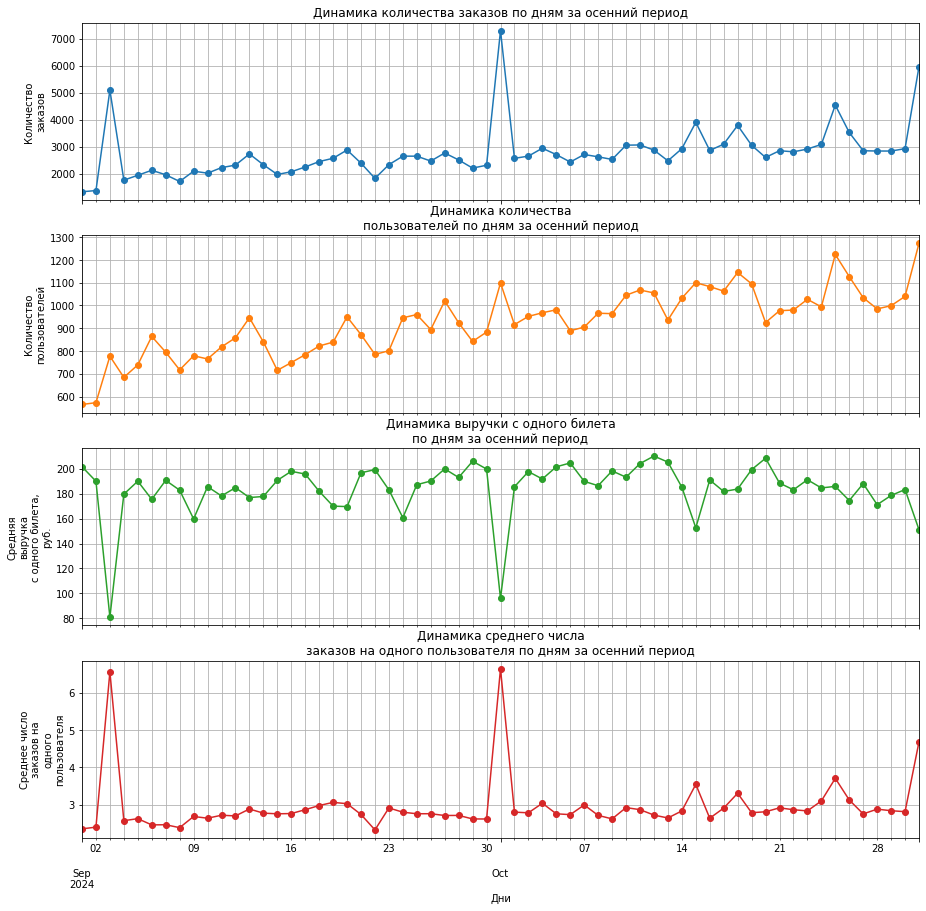

In [259]:
# Построим линейные  подграфики, которые будут отражать динамику полученных показателей по дням осеннего периода

axes=df_fall_gr.plot(kind='line',x='created_dt_msk', y=['order_id','user_id','one_ticket_revenue_rub','order_avg'],
                  subplots=True, sharex=True, sharey=False, marker='o',
                  title=['Динамика количества заказов по дням за осенний период',
                         'Динамика количества\nпользователей по дням за осенний период',
                        'Динамика выручки с одного билета\nпо дням за осенний период',
                        'Динамика среднего числа\nзаказов на одного пользователя по дням за осенний период'],
                    figsize=(15, 15),
                    legend=False)

axes[0].set_ylabel('Количество\nзаказов')
axes[1].set_ylabel('Количество\nпользователей')
axes[2].set_ylabel('Средняя\nвыручка\nс одного билета,\nруб.')
axes[3].set_ylabel('Среднее число\nзаказов на\nодного\nпользователя')

axes[0].grid(which='both')
axes[1].grid(which='both')
axes[2].grid(which='both')
axes[3].grid(which='both')

plt.xlabel('Дни')

plt.grid(True)
plt.show()

In [260]:
#Создадим новый столбец с днем недели в датафрейме df_fall
df_fall['dayofweek'] = df_fall['created_dt_msk'].dt.dayofweek+1

In [261]:
# Создаем дополнительный столбец dayofweek
def get_dow(row):
    if row['dayofweek'] == 1:
        return "понедельник"
    elif row['dayofweek'] == 2:
        return "вторник"
    elif row['dayofweek'] == 3:
        return "среда"
    elif row['dayofweek'] == 4:
        return "четверг"
    elif row['dayofweek'] == 5:
        return "пятница"
    elif row['dayofweek'] == 6:
        return "суббота"
    else:
        return "воскресенье"
    
df_fall['dow']=df_fall.apply(get_dow, axis=1)

In [262]:
#Сгруппируем данные и получим сведения общего числа заказов, количества активных пользователей,
#средней стоимости одного билета   по дням недели. Рассчитаем среднее число заказов на одного пользователя
df_fall_gr_dow=df_fall.groupby('dow').agg({'order_id':'count','user_id':'nunique', 'one_ticket_revenue_rub':'mean'})
df_fall_gr_dow=df_fall_gr_dow.sort_values(by='order_id',ascending=False).reset_index()
df_fall_gr_dow['order_avg']=df_fall_gr_dow['order_id']/df_fall_gr_dow['user_id']
df_fall_gr_dow

,dow,order_id,user_id,one_ticket_revenue_rub,order_avg
0,вторник,31483,4797,141.617805,6.563060
1,четверг,27147,4968,178.718731,5.464372
2,пятница,24835,4871,186.321164,5.098542
3,среда,22880,4817,186.723514,4.749844
4,понедельник,21517,4447,184.798976,4.838543
5,суббота,21349,4570,192.818479,4.671554
6,воскресенье,19409,4397,198.951741,4.414146


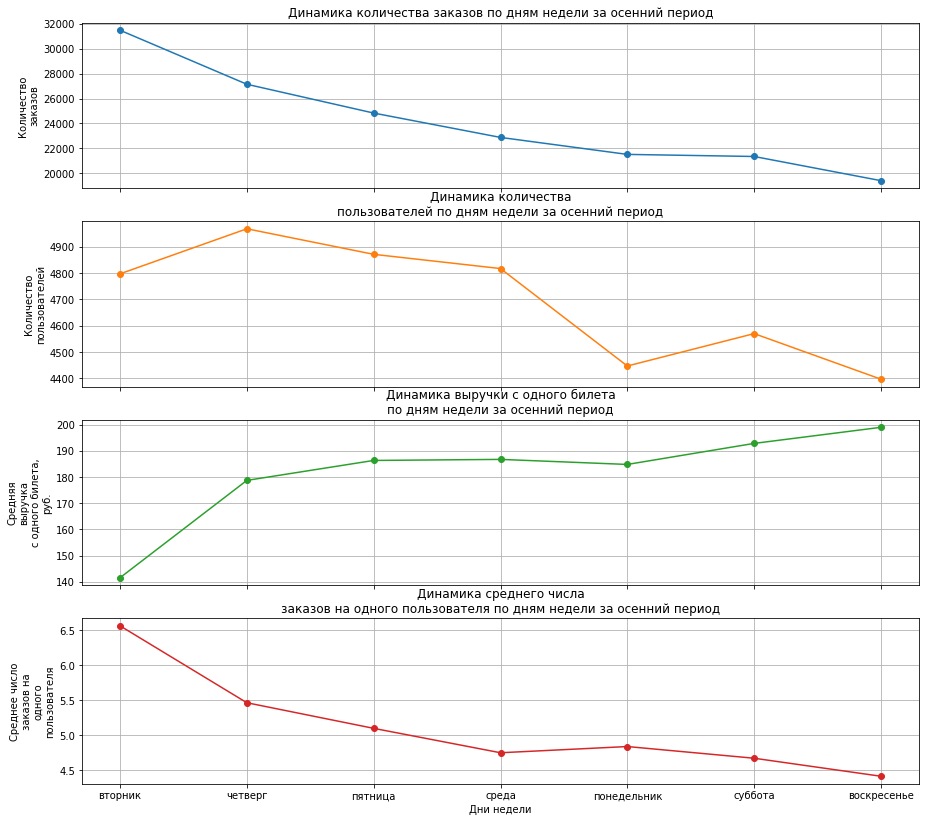

In [263]:
# Построим линейные  подграфики, которые будут отражать динамику полученных показателей по дням недели

axes=df_fall_gr_dow.plot(kind='line',x='dow', y=['order_id','user_id','one_ticket_revenue_rub','order_avg'],
                  subplots=True, sharex=True, sharey=False, marker='o',
                  title=['Динамика количества заказов по дням недели за осенний период',
                         'Динамика количества\nпользователей по дням недели за осенний период',
                         'Динамика выручки с одного билета\nпо дням недели за осенний период',
                        'Динамика среднего числа\nзаказов на одного пользователя по дням недели за осенний период'],
                    figsize=(15, 14),
                    legend=False)

axes[0].set_ylabel('Количество\nзаказов')
axes[1].set_ylabel('Количество\nпользователей')
axes[2].set_ylabel('Средняя\nвыручка\nс одного билета,\nруб.')
axes[3].set_ylabel('Среднее число\nзаказов на\nодного\nпользователя')

axes[0].grid(which='both')
axes[1].grid(which='both')
axes[2].grid(which='both')
axes[3].grid(which='both')

plt.xlabel('Дни недели')

plt.grid(True)
plt.show()

---
Анализ динамики показателей общего числа заказов, количества активных пользователей, среднего числа заказов на одного пользователя, средней выручки с одного билета по дням за осенний период позволяет сделать вывод о том, что в целом изменение показателей не имеет ярковыраженного общего тренда, есть небольшие колебания по дням, за исключением нескольких отклонений:
- в первые дни месяцев наблюдаются резкие пики: в количестве заказов и среднем числе заказов на одного пользователя - рост, в выручке с одного билета - спад.
- наблюдается заметная динамика к увеличению в изменении количества пользователей и менее заметное увеличение количества заказов.

Анализ пользовательской активности по дням недели показывает, что наибольшее количество заказов и количество пользователей приходится на будние дни - со вторника по пятницу. В понедельник и на выходних активность пользователей минимальна, но выручка с одного билета максимальная.


**Выделим ключевые регионы и партнёров, которые внесли наибольший вклад в выручку за осенний период 2024 года.**

In [264]:
#Сгруппируем данные по регионам и найдем для каждого уникальное количество мероприятий и 
#общее число заказов, отсортировав по числу мероприятий в порядке убывания
df_region=df_fall.groupby('region_name').agg({'event_id':'nunique','order_id':'count'}).reset_index().sort_values(by='event_id',ascending=False).reset_index(drop=True)

In [265]:
#Создадим новый столбец с долей количества заказов по регионам к общему числу заказов
df_region['order_share']=df_region['order_id']*100/df_fall['order_id'].count()

In [266]:
#Создадим новый столбец с долей количества уникальных событий по регионам к общему числу событий
df_region['event_share']=df_region['event_id']*100/df_fall['event_id'].nunique()

In [267]:
#Выводим первые 15 строк датафрейма
df_region[:15]

,region_name,event_id,order_id,order_share,event_share
0,Каменевский регион,3914,46723,27.709050,24.703358
1,Североярская область,2611,20712,12.283240,16.479424
2,Широковская область,796,8648,5.128692,5.023984
3,Светополянский округ,762,4771,2.829439,4.809392
4,Речиновская область,529,3566,2.114814,3.338803
5,Серебринская область,456,4470,2.650931,2.878061
6,Яблоневская область,431,4196,2.488436,2.720273
7,Тепляковская область,419,2486,1.474321,2.644534
8,Горицветская область,406,3231,1.916143,2.562484
9,Солнечноземская область,402,4201,2.491401,2.537238


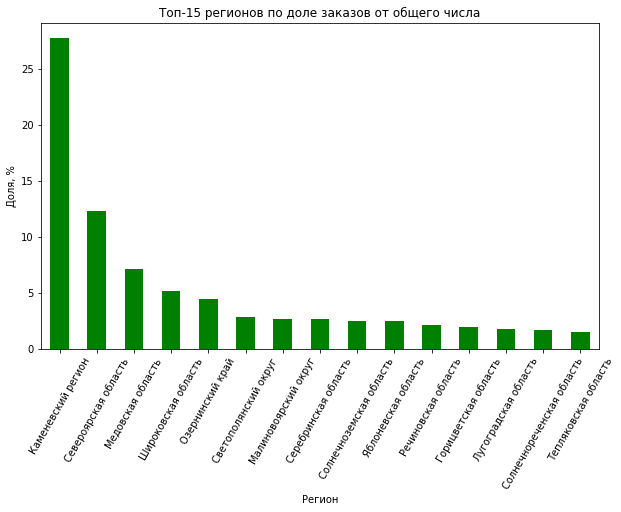

In [268]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_region.sort_values(by='order_id',ascending=False)[0:15].plot(kind='bar',
                     x='region_name',
                     y='order_share',
                     title='Топ-15 регионов по доле заказов от общего числа',
                     legend=False,
                     ylabel='Доля, %',
                     xlabel='Регион',
                     rot=60,
                     color='green',
                     figsize=(10,6))

plt.show()

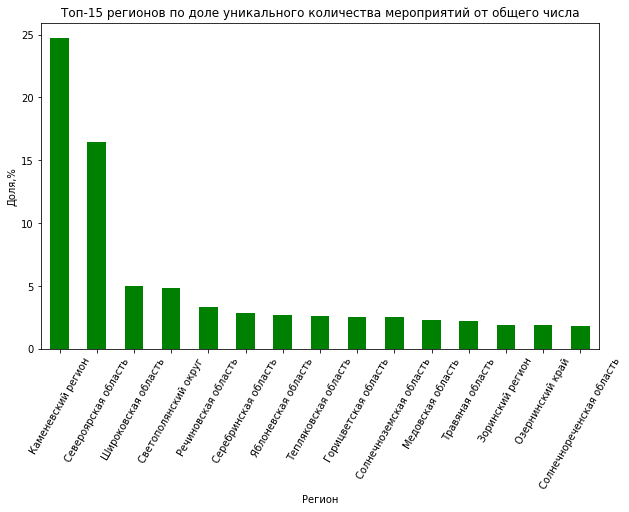

In [269]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_region[0:15].plot(kind='bar',
                     x='region_name',
                     y='event_share',
                     title='Топ-15 регионов по доле уникального количества мероприятий от общего числа',
                     legend=False,
                     ylabel='Доля,%',
                     xlabel='Регион',
                     rot=60,
                     color='green',
                     figsize=(10,6))

plt.show()

In [270]:
#Сгруппируем данные по регионам и найдем для каждого уникальное количество мероприятий и 
#общее число заказов, отсортировав по числу мероприятий в порядке убывания
df_service_name=df_fall.groupby('service_name').agg({'event_id':'nunique','order_id':'count', 'revenue_rub':'sum'}).reset_index().sort_values(by='event_id',ascending=False).reset_index(drop=True)

In [271]:
#Округлим поле с выручкой до 2 знаков после запятой
df_service_name['revenue_rub']=round(df_service_name['revenue_rub'],2)

In [272]:
#Создадим новый столбец с долей количества заказов по каждому билетному партнеру к общему числу заказов
df_service_name['order_share']=df_service_name['order_id']*100/df_fall['order_id'].count()

In [273]:
#Создадим новый столбец с долей количества уникальных событий по каждому билетному партнеру  к общему числу событий
df_service_name['event_share']=df_service_name['event_id']*100/df_fall['event_id'].nunique()

In [274]:
#Создадим новый столбец с долей вырочки по каждому билетному партнеру  к общему событий
df_service_name['revenue_share']=round(df_service_name['revenue_rub']*100/df_fall['revenue_rub'].sum(),6)

In [275]:
#Выводим первые 15 строк датафрейма
df_service_name[:15]

,service_name,event_id,order_id,revenue_rub,order_share,event_share,revenue_share
0,Лови билет!,3613,25784,10413094.93,15.291187,22.803585,12.637517
1,Билеты без проблем,2837,32464,12525363.21,19.252758,17.905832,15.201003
2,Билеты в руки,2457,25649,7621681.99,15.211126,15.507448,9.249808
3,Облачко,1409,15478,10611051.69,9.179220,8.892956,12.877760
4,Лучшие билеты,1389,12406,1676033.68,7.357372,8.766726,2.034064
5,Мой билет,1005,19421,10858727.07,11.517614,6.343095,13.178344
6,Тебе билет!,858,3765,2181787.80,2.232831,5.415299,2.647856
7,Прачечная,728,5798,2548310.47,3.438501,4.594799,3.092675
8,Весь в билетах,600,9427,9379748.64,5.590677,3.786922,11.383429
9,Яблоко,537,3473,2763332.31,2.059661,3.389296,3.353629


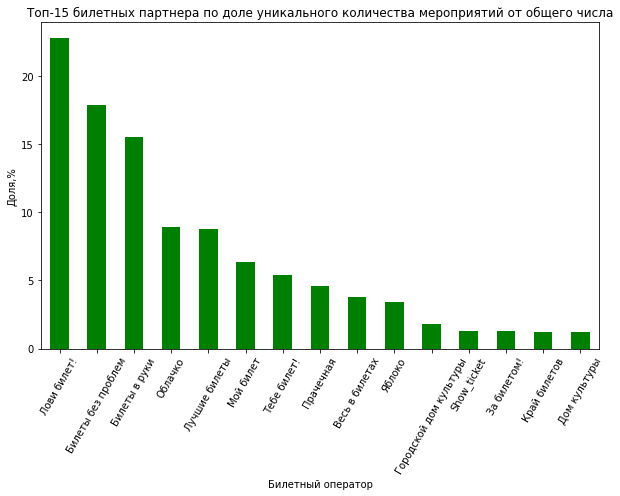

In [276]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_service_name[0:15].plot(kind='bar',
                     x='service_name',
                     y='event_share',
                     title='Топ-15 билетных партнера по доле уникального количества мероприятий от общего числа',
                     legend=False,
                     ylabel='Доля,%',
                     xlabel='Билетный оператор',
                     rot=60,
                     color='green',
                     figsize=(10,6))

plt.show()

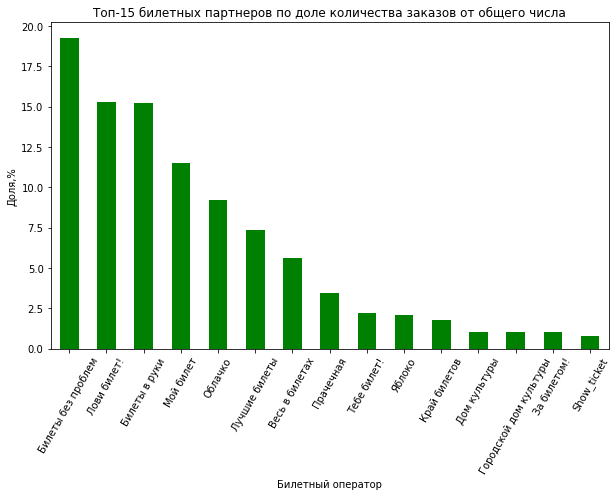

In [277]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_service_name.sort_values(by='order_id',ascending=False)[0:15].plot(kind='bar',
                     x='service_name',
                     y='order_share',
                     title='Топ-15 билетных партнеров по доле количества заказов от общего числа',
                     legend=False,
                     ylabel='Доля,%',
                     xlabel='Билетный оператор',
                     rot=60,
                     color='green',
                     figsize=(10,6))

plt.show()

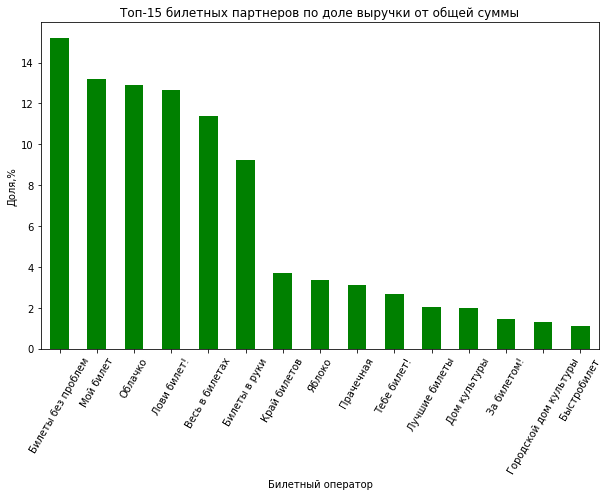

In [278]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_service_name.sort_values(by='revenue_share',ascending=False)[0:15].plot(kind='bar',
                     x='service_name',
                     y='revenue_share',
                     title='Топ-15 билетных партнеров по доле выручки от общей суммы',
                     legend=False,
                     ylabel='Доля,%',
                     xlabel='Билетный оператор',
                     rot=60,
                     color='green',
                     figsize=(10,6))

plt.show()

___
Анализ популярности событий по регионам и активности партнеров позволяет сделать следующие выводы:
1. По доле проводимых мероприятий от их общего числа и доле заказов  от общего числа заказов распределение в целом не является равномерным. Явными лидерами являются Каменевский регион и Североярская область, их совместная доля  составляет 30% по каждому показателю,  остальные регионы в отдельности имеют долю 5% и меньше.


2. Распределние билетных партнеров по показателям доли проводимых мероприятий от их общего числа, доле заказов  от общего числа заказов и доле выручки от общей суммы выручки также неравномерное. По каждому показателю можно выделить топ - 7 лидеров: 
- - по доле уникального количества мероприятий: Лови билет!, Билеты без проблем, Билеты в руки, Облачко, Лучшие билеты, Мой билет, Тебе билет!
- - по доле количества заказов: Билеты без проблем, Лови билет!, Билеты в руки, Мой билет, Облачко, Лучшие билеты, Весь в билетах
- - по доле выручки: Билеты без проблем, Мой билет, Облачко, Лови билет!, Весь в билетах, Билеты в руки, Край билетов.

Как мы видим, за небольшим исключением, лидеры повторяются, хотя в разных рейтингах они могут занимать разные позиции, то есть большее количество проданных билетов не всегда гарантирует большую выручку. Остальные билетные операторы имеют доли менее 5%.


## 4. Статистический анализ данных  <a id='soderjanie_4'></a>

Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств. Для анализа используем данные только за осенний период.

**Перед проведением проверки гипотез изучим сравниваемые данные.**
В первую очередь проверим независимость данных, есть ли пересечения в пользователях мобильных и стационарных устройств.

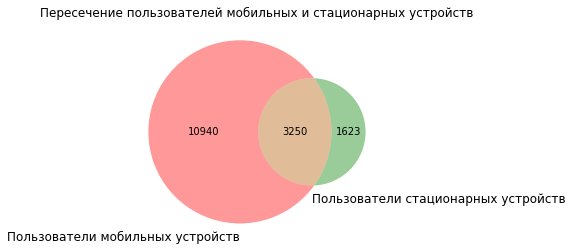

In [279]:
# Строим диаграмму Венна для проверки и визуализации пересечений пользователей 
# мобильных и стационарных устройств.
A=set(df_fall[df_fall['device_type_canonical']=='mobile']['user_id'].unique())
B=set(df_fall[df_fall['device_type_canonical']=='desktop']['user_id'].unique())
venn2([A, B], set_labels=('Пользователи мобильных устройств', 'Пользователи стационарных устройств'))
# Отображаем график
plt.title("Пересечение пользователей мобильных и стационарных устройств")
plt.show()

In [280]:
# Применяем метод intersection для выявления количества пересечений
len(A.intersection(B))

3250

График показывает, что 3259 пользователей присутсвуют в обоих группах. Исключим их.

In [281]:
#Сохраним список идентификаторов пользователей из пересечения данных
users_del=A.intersection(B)

In [282]:
# Сохраним датасет без пересекающихся данных
df_fall_del=df_fall[~df_fall['user_id'].isin(users_del)].reset_index(drop=True)

**Проведем проверку первой гипотезы.
Сформулируем нулевую и альтернативную гипотезы и рассчитаем показатели**:

*Нулевая гипотеза H₀*: Среднее количество заказов на одного пользователя мобильного приложения не выше, чем на одного пользователями стационарных устройств.

*Альтернативная гипотеза H₁*: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


In [283]:
#Сгруппируем данные по типу устройства и пользователю и посчитаем для каждого количество заказов
df_fall_order=df_fall_del.groupby(['device_type_canonical','user_id'])['order_id'].count().reset_index()
df_fall_order

,device_type_canonical,user_id,order_id
0,desktop,0040e12d70fae81,1
1,desktop,006d1660d830822,7
2,desktop,00bdfa36a6e542b,1
3,desktop,00cb8c1ef996876,2
4,desktop,00e62ce48c12cb4,2
...,...,...,...
12558,mobile,ffe364dd8211157,3
12559,mobile,ffe73c50cbd71fc,2
12560,mobile,ffed3ff067d4f12,3
12561,mobile,fff13b79bd47d7c,3


In [284]:
#Сгруппируем данные по типу устройства и найдем среднее количество заказов на одного пользователя
df_fall_avg_order=df_fall_order.groupby('device_type_canonical')['order_id'].mean()
df_fall_avg_order

device_type_canonical
desktop    1.967344
mobile     2.858501
Name: order_id, dtype: float64

In [285]:
# Рассчитываем разницу в средних значениях количества заказов на одного пользователя 
# мобильных и стационарных устройств
avg_mobile=df_fall_order[df_fall_order['device_type_canonical']=='mobile']['order_id'].mean()
avg_desktop=df_fall_order[df_fall_order['device_type_canonical']=='desktop']['order_id'].mean()

(1-avg_mobile/avg_desktop)*100

-45.297431366947016

Сравнение показвает, что среднее значение количества заказов с мобильных устройств на 45% больше, чем у пользователей стационарных устройств. Чтобы проверить, является ли это изменение статистически значимым, необходимо провести статистический тест.
Так как метрикой выступает среднее значение, то есть это непрерывная метрика, поэтому проведем проврку условий для выбора t-теста. В первую очередь - нормальность распределения выборочных средних.

**Визуализируем распределения количества заказов пользователей мобильных и стационарных устройств и проведем тест Шапиро-Уилка для проверки нормальности распределения выборочного среднего.**

Для проверки нормальности распределения выборочного среднего напишем цикл while, который запустим 1000 раз. Для этого будем считать с помощью переменной n количество итераций цикла. Когда она станет равна 1000 — остановимся.
Внутри цикла мы каждый раз будем случайным образом брать 100 случайных значений и вычислять их среднюю оценку. Получившийся результат запишем в список. Проведем тест отдельно для пользователей мобильных и стационарных устройств.

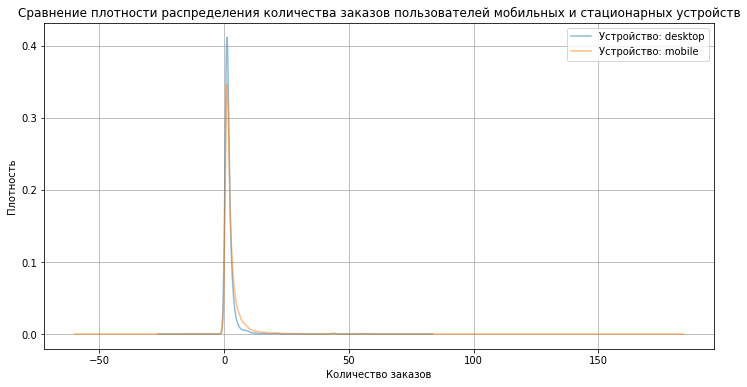

In [286]:
# Строим гистограмму распределения количества заказов пользователей мобильных и стационарных устройств
column = 'order_id'

# Создаём фигуру графика
plt.figure(figsize=(12, 6))

# Строим гистограммы для каждого значения device_type_canonical
for i in df_fall_order['device_type_canonical'].unique():
    # Фильтруем данные по значению столбца device_type_canonical
    df_fall_order.loc[df_fall_order['device_type_canonical'] == i, column].plot(
        kind='kde',
        alpha=0.5,
        label=f'Устройство: {i}',
        legend=True, 
        grid=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение плотности распределения количества заказов пользователей мобильных и стационарных устройств')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность')
plt.legend()
plt.show()

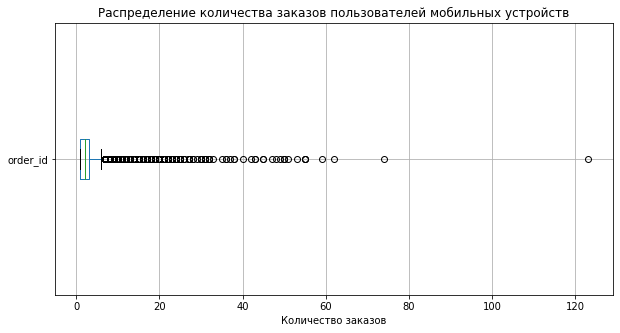

In [287]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 5))
df_fall_order[df_fall_order['device_type_canonical']=='mobile'].boxplot(column='order_id', vert=False)
plt.title('Распределение количества заказов пользователей мобильных устройств')
plt.xlabel('Количество заказов')
plt.show()

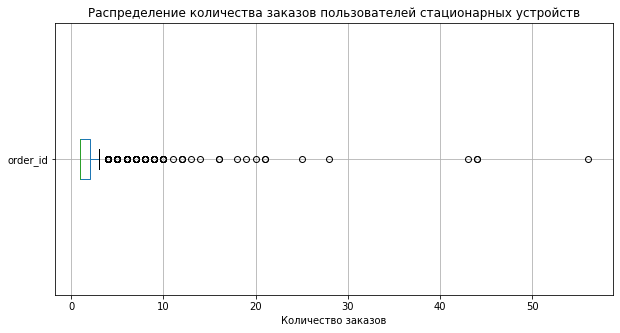

In [288]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 5))
df_fall_order[df_fall_order['device_type_canonical']=='desktop'].boxplot(column='order_id', vert=False)
plt.title('Распределение количества заказов пользователей стационарных устройств')
plt.xlabel('Количество заказов')
plt.show()

In [289]:
# Задаём уровень значимости
alpha = 0.05  

In [290]:
# Сохраняем выборки количества заказов пользователей мобильных и стационарных устройств
mobile=df_fall_order[df_fall_order['device_type_canonical']=='mobile']['order_id']
desktop=df_fall_order[df_fall_order['device_type_canonical']=='desktop']['order_id']

Сформулируем нулевую и альтернативную гипотезу для теста Шапиро-Уилка для пользователей мобильных устройств:

*Нулевая гипотеза H₀*: Выборочное среднее количества заказов пользователей мобильных устройств имеет нормальное распределение.

*Альтернативная гипотеза H₁*: Распределение выборочного среднего количества заказов пользователей мобильных устройств не является нормальным.

In [291]:
# тест Шапиро-Уилка для пользователей мобильных устройств

means_fic1 = []
n1 = 0

while n1 < 1000:
    n1 += 1
    sample1 = mobile.sample(100).mean()
    means_fic1.append(sample1)

stat1_shapiro, p1_shapiro = scipy.stats.shapiro(means_fic1) 
print('Statistics=%.3f, p-value=%.3f' % (stat1_shapiro, p1_shapiro))

if p1_shapiro > alpha:
    print('Принять нулевую гипотезу. Выборочное среднее количества заказов пользователей мобильных устройств имеет нормальное распределение.')
else:
    print('Отклонить нулевую гипотезу. Распределение выборочного среднего количества заказов пользователей мобильных устройств не является нормальным.')

Statistics=0.956, p-value=0.000
Отклонить нулевую гипотезу. Распределение выборочного среднего количества заказов пользователей мобильных устройств не является нормальным.


Сформулируем нулевую и альтернативную гипотезу для теста Шапиро-Уилка для пользователей стационарных устройств:

*Нулевая гипотеза H₀*: Выборочное среднее количества заказов пользователей стационарных устройств имеет нормальное распределение.

*Альтернативная гипотеза H₁*: Распределение выборочного среднего количества заказов пользователей стационарных устройств не является нормальным.

In [292]:
# тест Шапиро-Уилка для пользователей стационарных устройств

means_fic2 = []
n2 = 0

while n2 < 1000:
    n2 += 1
    sample2 = desktop.sample(100).mean()
    means_fic2.append(sample2)

stat2_shapiro, p2_shapiro = scipy.stats.shapiro(means_fic2) 
print('Statistics=%.3f, p-value=%.3f' % (stat2_shapiro, p2_shapiro))

if p2_shapiro > alpha:
    print('Принять нулевую гипотезу. Выборочное среднее количества заказов пользователей стационарных устройств имеет нормальное распределение.')
else:
    print('Отклонить нулевую гипотезу. Распределение выборочного среднего количества заказов пользователей стационарных устройств не является нормальным.')

Statistics=0.956, p-value=0.000
Отклонить нулевую гипотезу. Распределение выборочного среднего количества заказов пользователей стационарных устройств не является нормальным.


С помощью теста Шапиро проведены проверки на нормальность выборочных средних, в результате которых выявлено, что назвать распределение нормальным нельзя. Таким образом, для проверки гипотезы выбран **тест Манна-Уитни**.

In [293]:
# Проводим тест Манна — Уитни
mw_test = mannwhitneyu(
    desktop,
    mobile,
    alternative='less'
)

In [294]:
# Интерпретируем результаты
if  mw_test.pvalue>alpha: 
    print(f'pvalue={round(mw_test.pvalue,6)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее количество заказов на одного пользователя мобильного приложения не выше, чем на одного пользователями стационарных устройств.')
else:
    print(f'pvalue={round(mw_test.pvalue,6)} < {alpha}')
    print('Альтернативная гипотеза находит подтверждение! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.')

pvalue=0.0 < 0.05
Альтернативная гипотеза находит подтверждение! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


---

**Проведем проверку второй гипотезы.
Сформулируем нулевую и альтернативную гипотезы и рассчитаем показатели**:


*Нулевая гипотеза H₀*: Среднее время между заказами пользователей мобильных приложений не выше, чем между заказами пользователей стационарных устройств.

*Альтернативная гипотеза H₁*: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

In [295]:
#Сохранит датафрейм с данными об идентификаторе пользователя, типе устройства и 
#непустыми значениями времени между заказами
df_fall_days=df_fall_del[~df_fall_del['days_since_prev'].isna()][['order_id','user_id','device_type_canonical','days_since_prev']].reset_index(drop=True)
df_fall_days

,order_id,user_id,device_type_canonical,days_since_prev
0,5009432,06c73b84b2405f3,mobile,9.0
1,2790149,087a90accc1e4b0,mobile,75.0
2,3643242,35033a947748839,mobile,10.0
3,5608369,9b7daff217df21f,mobile,40.0
4,459883,c2e3afcac39c500,mobile,7.0
...,...,...,...,...
26651,1887060,fe4d153ab6d9997,mobile,8.0
26652,1886944,fe4d153ab6d9997,mobile,7.0
26653,1887089,fe4d153ab6d9997,mobile,0.0
26654,7632975,fea157f5f7882b2,mobile,12.0


In [296]:
#Сгруппируем данные по типу устройства и найдем среднее время между заказами
df_fall_avg_days=df_fall_days.groupby('device_type_canonical')['days_since_prev'].mean()
df_fall_avg_days

device_type_canonical
desktop    18.165217
mobile     13.790735
Name: days_since_prev, dtype: float64

In [297]:
# Рассчитываем разницу в средних значениях времени между заказами, совершаемых пользователями 
# мобильных и стационарных устройств
avg_days_mobile=df_fall_days[df_fall_days['device_type_canonical']=='mobile']['days_since_prev'].mean()
avg_days_desktop=df_fall_days[df_fall_days['device_type_canonical']=='desktop']['days_since_prev'].mean()

(1-avg_days_mobile/avg_days_desktop)*100

24.081643135260077

Сравнение показвает, что среднее значение времени между заказами пользователей мобильных устройств на 24% меньше, чем у пользователей стационарных устройств. Чтобы проверить, является ли это изменение статистически значимым, необходимо провести статистический тест.
Так как метрикой выступает среднее значение, то есть это непрерывная метрика, поэтому проведем проврку условий для выбора t-теста. В первую очередь - нормальность распределения выборочных средних.

**Визуализируем распределения времени между заказами пользователей мобильных и стационарных устройств и проведем тест Шапиро-Уилка для проверки нормальности распределения выборочного среднего.**

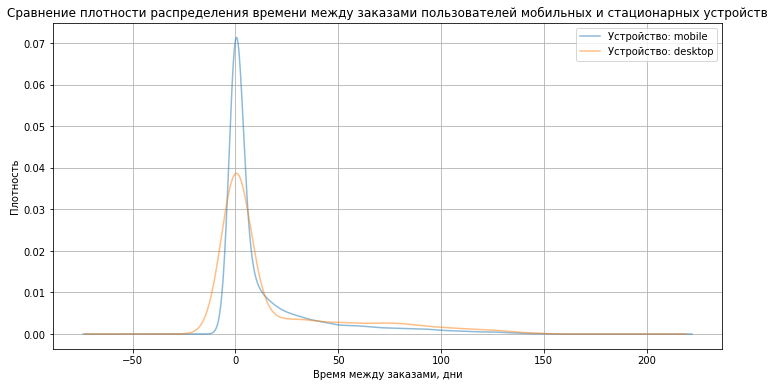

In [298]:
# Строим гистограмму распределения времени между заказами пользователей мобильных и стационарных устройств
column = 'days_since_prev'

# Создаём фигуру графика
plt.figure(figsize=(12, 6))

# Строим гистограммы для каждого значения device_type_canonical
for i in df_fall_days['device_type_canonical'].unique():
    # Фильтруем данные по значению столбца device_type_canonical
    df_fall_days.loc[df_fall_days['device_type_canonical'] == i, column].plot(
        kind='kde',
        alpha=0.5,
        label=f'Устройство: {i}',
        legend=True, 
        grid=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение плотности распределения времени между заказами пользователей мобильных и стационарных устройств')
plt.xlabel('Время между заказами, дни')
plt.ylabel('Плотность')
plt.legend()
plt.show()

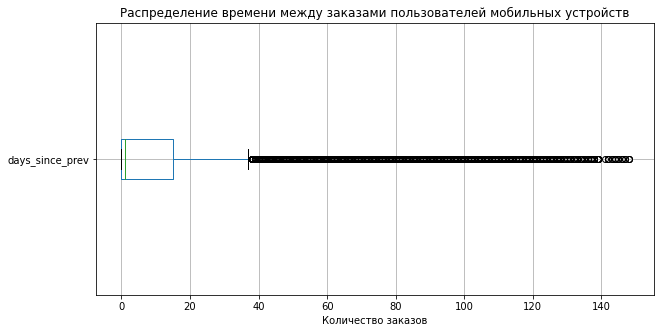

In [299]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 5))
df_fall_days[df_fall_days['device_type_canonical']=='mobile'].boxplot(column='days_since_prev', vert=False)
plt.title('Распределение времени между заказами пользователей мобильных устройств')
plt.xlabel('Количество заказов')
plt.show()

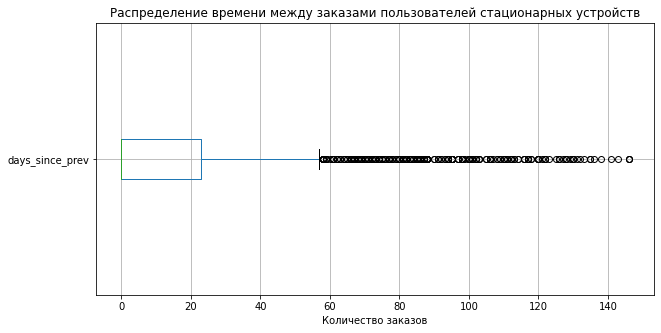

In [300]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 5))
df_fall_days[df_fall_days['device_type_canonical']=='desktop'].boxplot(column='days_since_prev', vert=False)
plt.title('Распределение времени между заказами пользователей стационарных устройств')
plt.xlabel('Количество заказов')
plt.show()

In [301]:
# Сохраняем выборки значений времени между заказами пользователей мобильных и стационарных устройств
mobile_days=df_fall_days[df_fall_days['device_type_canonical']=='mobile']['days_since_prev']
desktop_days=df_fall_days[df_fall_days['device_type_canonical']=='desktop']['days_since_prev']

Сформулируем нулевую и альтернативную гипотезу для теста Шапиро-Уилка для пользователей мобильных устройств:

*Нулевая гипотеза H₀*: Выборочное среднее времени между заказами пользователей мобильных устройств имеет нормальное распределение.

*Альтернативная гипотеза H₁*: Распределение выборочного среднего времени между заказами пользователей мобильных устройств не является нормальным.

In [302]:
# тест Шапиро-Уилка для пользователей мобильных устройств

means_fic3 = []
n3 = 0

while n3 < 1000:
    n3 += 1
    sample3 = mobile_days.sample(100).mean()
    means_fic3.append(sample3)

stat3_shapiro, p3_shapiro = scipy.stats.shapiro(means_fic3) 
print('Statistics=%.3f, p-value=%.3f' % (stat3_shapiro, p3_shapiro))

if p3_shapiro > alpha:
    print('Принять нулевую гипотезу. Выборочное среднее времени между заказами пользователей мобильных устройств имеет нормальное распределение.')
else:
    print('Отклонить нулевую гипотезу. Распределение выборочного среднего времени между заказами пользователей мобильных устройств не является нормальным.')

Statistics=0.995, p-value=0.002
Отклонить нулевую гипотезу. Распределение выборочного среднего времени между заказами пользователей мобильных устройств не является нормальным.


Сформулируем нулевую и альтернативную гипотезу для теста Шапиро-Уилка для пользователей стационарных устройств:

*Нулевая гипотеза H₀*: Выборочное среднее времени между заказами пользователей стационарных устройств имеет нормальное распределение.

*Альтернативная гипотеза H₁*: Распределение выборочного среднего времени между заказами пользователей стационарных устройств не является нормальным.

In [303]:
# тест Шапиро-Уилка для пользователей стационарных устройств

means_fic4 = []
n4 = 0

while n4 < 1000:
    n4 += 1
    sample4 = desktop.sample(100).mean()
    means_fic4.append(sample4)

stat4_shapiro, p4_shapiro = scipy.stats.shapiro(means_fic4) 
print('Statistics=%.3f, p-value=%.3f' % (stat4_shapiro, p4_shapiro))

if p4_shapiro > alpha:
    print('Принять нулевую гипотезу. Выборочное среднее времени между заказами пользователей стационарных устройств имеет нормальное распределение.')
else:
    print('Отклонить нулевую гипотезу. Распределение выборочного среднего времени между заказами пользователей стационарных устройств не является нормальным.')

Statistics=0.948, p-value=0.000
Отклонить нулевую гипотезу. Распределение выборочного среднего времени между заказами пользователей стационарных устройств не является нормальным.


С помощью теста Шапиро проведены проверки на нормальность выборочных средних, в результате которых выявлено, что назвать распределение нормальным нельзя. Таким образом, для проверки гипотезы выбран **тест Манна-Уитни**.

In [304]:
# Проводим тест Манна — Уитни
mw_test1 = mannwhitneyu(
    desktop_days,
    mobile_days,
    alternative='less'
)

In [305]:
# Интерпретируем результаты
if  mw_test1.pvalue>alpha: 
    print(f'pvalue={round(mw_test1.pvalue,6)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее время между заказами пользователей мобильных приложений не выше, чем между заказами пользователей стационарных устройств.')
else:
    print(f'pvalue={round(mw_test1.pvalue,6)} < {alpha}')
    print('Альтернативная гипотеза находит подтверждение! Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.')

pvalue=0.0 < 0.05
Альтернативная гипотеза находит подтверждение! Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


---
Для проверки гипотез, выдвинуых командой продуктового отдела, относительно активности пользователей мобильных и стационарных устройств были проведены статистические А/В тесты.

В качестве целевых метрик использовались среднее количество заказов на одного пользователя и среднее время между заказами пользователей .

Ввиду того, что в выборках наблюдается большое количество выбросов, и в обоих тестах не соблюдается условие нормальности выборочного распределения, для проверки использован не t-тест, а непараметрический тест Маннта-Уитни.

Для проведения теста выбран уровень значимости — 0.05.

Первый тест показал значение pvalue=0.0, что меньше установленного уровня значимости.
Следовательно, альтернативная гипотеза находит подтверждение, и среднее количество заказов на одного пользователя мобильного приложения выше, чем  на одного пользователями стационарных устройств.

Второй тест показал значение pvalue=0.0, что также меньше установленного уровня значимости.
Следовательно, альтернативная гипотеза находит подтверждение, и среднее время между заказами пользователей мобильных приложений выше, чем между заказами пользователей стационарных устройств.

Таким образом можно утверждать, что пользователи мобильных устройств более активны, чем пользователи стационарных устройств, так как количество заказов у них больше на одного пользователя, но стоит учитывать, что время между заказами у них тоже больше.


## 5. Общий вывод и рекомендации  <a id='soderjanie_5'></a>

Анализ был проведен с целью  выявления закономерностей и причин в изменении пользовательских предпочтений и популярности событий на сервисе продажи билетов на мероприятия и культурные события осенью 2024 года, а также проверки гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Анализ проведен с использованием данных о бронировании билетов за период с 1 июня по 31 октября 2024 года.

*На первом этапе анализа* проведена загрузка данных и первичное знакомство с ними. Выявлено, что данные содержат информацию о заказах билетов, совершённых с двух типов устройств: мобильных и стационарных, о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия, а также информацию о конвертации валют, так как данные о выручке прдставлены в рублях и тенге. Входящий датафрейм содержал 290611 строк и 28 столбцов. Пропуски содержались только в столбце days_since_prev (21913 строк), заполнению они не подлежали, так как это нормально, что для первого или единственного заказа пользователя это поле пустое.

*На втором этапе анализа* проведена предобработка данных и подготовка к исследованию, в результате которых был изменен тип данных у столбцов, содержащих временные данные, уменьшена разрядность у полей целочисленного типа, проверено и не выявлено аномалий в категориальных значениях, не выявлено явных дубликатов, удалены строки с неявными дубликатами, изучено распределение количественных показателей - выручки и количества билетов, выявлены аномальные выбросы по полю с выручкой, поэтому данные отфильтрованы по 99% перцентилю поля с выручкой. В ходе предобработки данных было отфильтровано всего 1.11% строк с данными от первоначального объема. Также созданы дополнительные столбцы, необходимые для анализа - выручка в рублях, выручка с продажи одного билета, месяц заказа и сезон.

*На третьем этапе* проведен исследовательский анализ данных, в ходе которого сделаны следующие шаги:
- Проведен анализ общего количества заказов, который показал стабильное увеличение с июня по октябрь, при этом с сентября рост стал более интенсивным.
- Проведен анализ распределения долей заказов по разным категориям, который позволяет сделать следующие выводы:
-- По типам мероприятий распределение имеет общие черты - топ-3 мероприяти одинаковые, это концерты, другое и театр. Но есть и различия - с наступление осени становятся более популярны театры, они занимают 2 место (а летом третье), также осенью увеличивается доля  спортивных мероприятий и елок.
-- По типам устройст распределение практически не отличается, значительным преимуществом пользуются мобильные устройства. Но можно отметить, что осенью наблюдается незначительное увеличение доли стационарных устройств.
-- По возрастным категориям распределение имеет относительно равномерный характер. Но можно выделить следующие особенности: как летом, так и осенью наиболее популярной категорией является 16+, а наименее популярной - 18+. При этом осенью становятся значительно более популярна детская категория 0+, с четвертого места летом она перемещается на второе осенью, также более востребованной осенью становится категория 12+. А вот доля более взрослыех категорий 16+ и 18+ осенью уменьшается.
- Проведен анализ изменения выручки с продаж одного билета, который показал, что по всем типам мероприятий выручка с одного билета осенью падает, кроме 2 типов - выставки и стендап. Наиболее значительный спад в выручке с одного билета наблюдается по следующим типам мероприятий - театр и елки.
- Проведен анализ динамики показателей общего числа заказов, количества активных пользователей, среднего числа заказов на одного пользователя, средней выручки с одного билета по дням за осенний период, который позволяет сделать вывод о том, что в целом изменение показателей не имеет ярковыраженного общего тренда, есть небольшие колебания по дням, за исключением нескольких отклонений:
-- в первые дни месяцев наблюдаются резкие пики: в количестве заказов и среднем числе заказов на одного пользователя - рост, в выручке с одного билета - спад.
-- наблюдается заметная динамика к увеличению в изменении количества пользователей и менее замтное увеличение количества заказов.
- Проведен анализ пользовательской активности по дням недели, который показывает, что наибольшее количество заказов и количество пользователей приходится на будние дни - со вторника по пятницу. В понедельник и на выходних активность пользователей минимальна, но выручка с одного билета максимальная.
- Проведен анализ популярности событий по регионам и активности партнеров, который позволяет сделать следующие выводы:
-- По доле проводимых мероприятий от их общего числа и доле заказов  от общего числа заказов распределение в целом не является равномерным. Явными лидерами являются Каменевский регион и Североярская область, их совместная доля  составляет 30% по каждому показателю,  остальные регионы в отдельности имеют долю 5% и меньше.
-- Распределние билетных партнеров по показателям доли проводимых мероприятий от их общего числа, доле заказов  от общего числа заказов и доле выручки от общей суммы выручки также неравномерное. По каждому показателю можно выделить топ - 7 лидеров: по доле уникального количества мероприятий: Лови билет!, Билеты без проблем, Билеты в руки, Облачко, Лучшие билеты, Мой билет, Тебе билет!; по доле количества заказов: Билеты без проблем, Лови билет!, Билеты в руки, Мой билет, Облачко, Лучшие билеты, Весь в билетах, по доле выручки: Билеты без проблем, Мой билет, Облачко, Лови билет!, Весь в билетах, Билеты в руки, Край билетов. Как видно, за небольшим исключением, лидеры повторяются, хотя в разных рейтингах они могут занимать разные позиции, то есть большее количество проданных билетов не всегда гарантирует большую выручку. Остальные билетные операторы имеют доли менее 5%.

*На четвертом этапе* проведен статистический анализ данных для проверки гипотез, выдвинуых командой продуктового отдела, относительно активности пользователей мобильных и стационарных устройств. Результаты тестов показали, что можно утверждать, что пользователи мобильных устройств более активны, чем пользователи стационарных устройств, так как среднее количество заказов на одного пользователя мобильного приложения выше, чем на одного пользователями стационарных устройств, хотя среднее время между заказами пользователей мобильных приложений выше, чем между заказами пользователей стационарных устройств.

___
Проведенный анализ и сделанные выводы помогает сделать следующие рекомендации, на что стоит обратить внимание в первую очередь:
- Спрос на билеты с наступлением осени увеличился на такие мероприятия как театр, спорт и елки, а также среди детских категорий, что вызвано окончанием периода каникул и отпусков, началом театрального сезона, спортивого соревновательного сезона, школьного периода, а также приближающихся праздников.
- Резкий скачок спроса наблюдается в начале каждого месяца, что скорее всего связано с открытием продаж на некоторые мероприятия, в том числе театральные.
- Стоит рассмотреть акции выходного дня для привлечения клиентов в субботу и воскресенье.
- Самыми популярными мероприятиями являются концерты, театр и другое. Требуется более детальная расшифровка типа другое.
- Необходимо проанализировать причины роста выручки с одного билета на такие мероприятия как выставки и стендап.
- Выявить причины популярности событий в Каменевском регионе и Североярской области. Возможно стоит задуматьсяо рекламных кампаниях в других регионах.
- Проанализировать причины популярности билетных партнеров - лидеров. 
- Пользователи мобильных устройств более активны, чем пользователи стационарных устройств. Стоит рассмотреть возможность оптимизации мобильного приложения, введении промоакции для еще большего привлечения и более частого возвращения пользователей через мобильные устройства.